# 5. Приближённое решение задачи Коши для обыкновенного дифференциального уравнения

Методами Эйлера, Рунге — Кутта четвертого порядка точности и методом Адамса третьего порядка найти приближённое решение задачи Коши для обыкновенного дифференциального уравнения на отрезке \([0,1]\). Шаг сетки \(h = 0.05\). Начало расчёта — точка \(x = 0\). Используя расчёт на грубой сетке \(c \, h = 0.1\), найти оценку точности по Рунге для половины узлов подробной сетки (только для решения, полученного с четвертым порядком точности по методу Рунге-Кутты). Для сравнения приведено точное решение \(u_0(x)\).

In [226]:
import numpy as np
import matplotlib.pyplot as plt

In [227]:
a, b = 0, 1
x0 = 0
Y0 = np.array([0, 1])

def F(x, Y):
    return np.array([Y[1], -np.tan(x)*Y[1] + (2*x/np.cos(x))*Y[0] + 2 - (2*x**3)/np.cos(x)])

def u0(x):
    return np.sin(x) + x**2

In [ ]:
def euler(F, x0, Y0, bounds, h=1e-2):
    n = int((bounds[1] - bounds[0]) / h)
    Y = [Y0]
    x = [x0]

    for _ in range(n):
        Y0 = Y0 + h*F(x0, Y0)
        x0 = x0 + h

        Y.append(Y0)
        x.append(x0)
    
    return np.array(x), np.array(Y)

def runge_kutta_4(F, x0, Y0, bounds, h=1e-2):
    n = int((bounds[1] - bounds[0]) / h)
    Y = [Y0]
    x = [x0]

    for _ in range(n):
        k1 = h*F(x0, Y0)
        k2 = h*F(x0 + h/2, Y0 + k1/2)
        k3 = h*F(x0 + h/2, Y0 + k2/2)
        k4 = h*F(x0 + h, Y0 + k3)
        Y0 = Y0 + (k1 + 2*k2 + 2*k3 + k4)/6
        x0 = x0 + h

        Y.append(Y0)
        x.append(x0)

    return np.array(x), np.array(Y)

def adam_3(F, x0, Y0, bounds, h=1e-2):
    n = int((bounds[1] - bounds[0])/h)
    start_bounds = [x0, x0 + 3*h]
    x, Y = runge_kutta_4(F, x0, Y0, start_bounds, h=h)
    x, Y = x.tolist(), Y.tolist()

    for i in range(3, n):
        fn = F(x[-1], Y[-1])
        fn1 = F(x[-2], Y[-2])
        fn2 = F(x[-3], Y[-3])
        
        Y_next = Y[-1] + h/12*(23*fn - 16*fn1 + 5*fn2)
        x.append(x[-1] + h)
        Y.append(Y_next)

    return np.array(x), np.array(Y)


In [ ]:
h = 0.05
grid = np.linspace(a, b, int((b - a)/h + 1))
euler_grid, euler_res = euler(F, x0, Y0, [a, b], h=h)
runge_kutta_grid, runge_kutta_res = runge_kutta_4(F, x0, Y0, [a, b], h=h)
adam_grid, adam_res = adam_3(F, x0, Y0, [a, b], h=h)

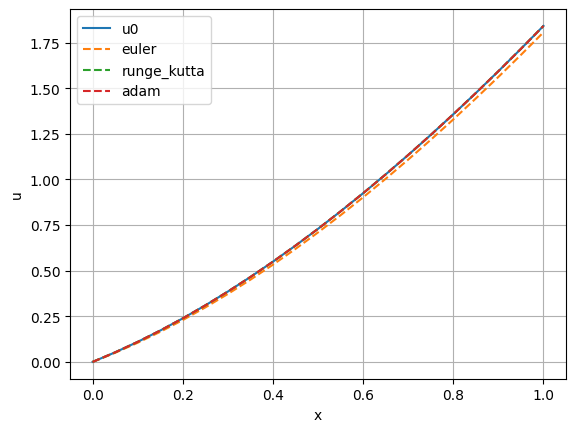

In [230]:
plt.plot(grid, u0(grid), label='u0')
plt.plot(euler_grid, euler_res[:, 0], label='euler', linestyle='--')
plt.plot(runge_kutta_grid, runge_kutta_res[:, 0], label='runge_kutta', linestyle='--')
plt.plot(adam_grid, adam_res[:, 0], label='adam', linestyle='--')

plt.xlabel('x')
plt.ylabel('u')
plt.grid(True)
plt.legend()

plt.show()

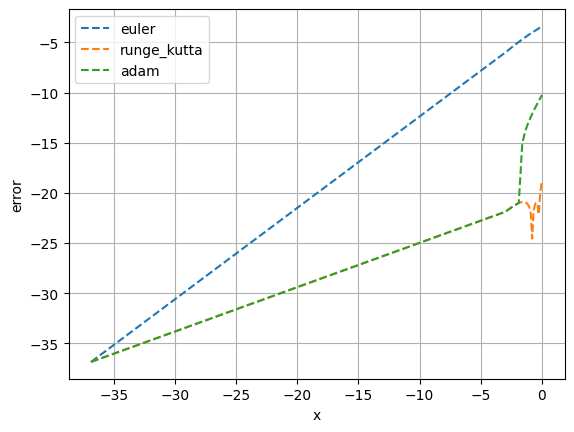

In [231]:
plt.plot(np.log(euler_grid + 1e-16), np.log(abs(u0(grid) - euler_res[:, 0]) + 1e-16), label='euler', linestyle='--')
plt.plot(np.log(runge_kutta_grid + 1e-16), np.log(abs(u0(grid) - runge_kutta_res[:, 0]) + 1e-16), label='runge_kutta', linestyle='--')
plt.plot(np.log(adam_grid + 1e-16), np.log(abs(u0(grid) - adam_res[:, 0]) + 1e-16), label='adam', linestyle='--')

plt.xlabel('x')
plt.ylabel('error')
plt.grid(True)
plt.legend()

plt.show()